**Last Updated**: *2 June 2025*

**Investigating distance to archaeological artefacts**

Mean distance CD centroids:   1457.33
Mean distance random points: 1330.88
Median distance CD centroids:   892.71
Median distance random points: 895.13
Mann–Whitney U statistic: 20519.0
P-value: 0.36424
Mann–Whitney U statistic: 20519.0
P-value: 0.18212


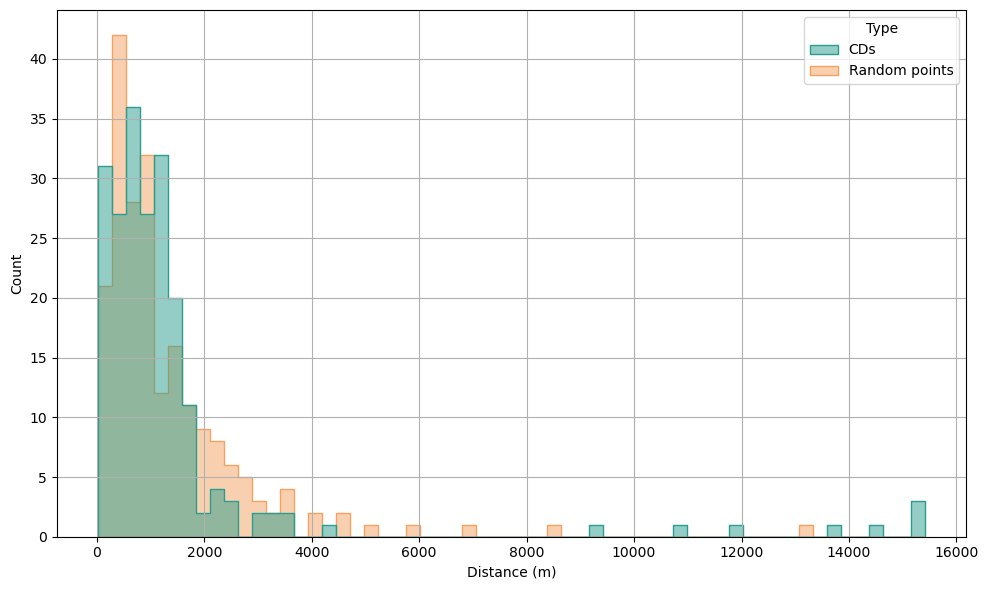

In [ ]:
# === Modules ===

# Modules
import geopandas as gpd
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cds = gpd.read_file("Data/distance_CD.shp")
randoms = gpd.read_file("Data/distance_random.shp")

# Inspect mean and median
cd_mean = cds['HubDist'].mean()
cd_median = cds['HubDist'].median()

rand_mean = randoms['HubDist'].mean()
rand_median = randoms['HubDist'].median()

print(f"Mean distance CD centroids:   {cd_mean:.2f}")
print(f"Mean distance random points: {rand_mean:.2f}")

print(f"Median distance CD centroids:   {cd_median:.2f}")
print(f"Median distance random points: {rand_median:.2f}")

# Combine into DataFrame
df = pd.concat([
    pd.DataFrame({'Distance': cds['HubDist'], 'Type': 'CDs'}),
    pd.DataFrame({'Distance': randoms['HubDist'], 'Type': 'Random points'})
])

# Mann-Whitney U test
"""Nonparametric test of the null hypothesis that the distribution 
underlying sample x is the same as the distribution underlying sample y. It is often used as a 
test of difference in location between distributions.
‘less’: the distribution underlying x is stochastically less than the distribution underlying y, i.e. SX(u) < SY(u) for all u.
"""
cd_distances = df[df['Type'] == 'CDs']['Distance']
rand_distances = df[df['Type'] == 'Random points']['Distance']

stat, p = mannwhitneyu(cd_distances, rand_distances)
stat_less, p_less = mannwhitneyu(cd_distances, rand_distances, alternative = 'less')

print(f"Mann–Whitney U statistic: {stat}")
print(f"P-value: {p:.5f}")
print(f"Mann–Whitney U statistic: {stat_less}")
print(f"P-value: {p_less:.5f}")

# Plot 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Distance', hue='Type', fill=True, palette={'CDs': '#2A9D8F', 'Random points': '#F4A261'}, alpha=0.5, element="step")
plt.xlabel("Distance (m)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()